In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Helper functions

def intensities_to_normalized(imgArray):
    # imgArray is a NxM array of uint8 [0,255]
    # normArray is a NxM array of floats in [-1,1]
    tmp = imgArray[:,:].copy()
    normArray = 2*(tmp/255.0 - .5)
    return normArray

def normalized_to_grayscale(normArray):
    # normArray is a NxM array of floats in [-1,1]
    # imgArray is a NxMx3 array of uint8 [0,255]
    tmp = np.round((normArray/2.0 + .5)*255)
    tmpInt = np.array(tmp, dtype='uint8')
    imgArray= np.stack( (tmpInt,tmpInt,tmpInt), axis=-1)
    return imgArray

def initialize_Ising(normArray):
    # Initialize Ising spins to match sign of background pixels.
    isingArray = np.sign(normArray)
    return isingArray

def metropolis_h(u):
    # Use metropolis function h(u) = u/(1+u)
    return u/(1.0+u)

def metropolis_step(isingArray, backgroundArray, theta, T):
    # Generate random indices of spin to flip
    i1 = np.random.randint(0, isingArray.shape[0])
    i2 = np.random.randint(0, isingArray.shape[1])
    # Zero pad Ising array to make calculation of energy easier for edge states
    paddedIsingArray = np.pad(isingArray,((1,1),(1,1)),'constant')
    # Calculte energy change if this spin was flipped
    energy_delta = -isingArray[i1,i2]*(2*theta*backgroundArray[i1,i2] + paddedIsingArray[i1,i2+1]
                                       + paddedIsingArray[i1+2,i2+1] + paddedIsingArray[i1+1,i2] 
                                       + paddedIsingArray[i1+1,i2+2])
    # Calculate acceptance rate
    h_arg = np.exp(energy_delta/T)
    h = metropolis_h(h_arg)
    # Determine if tweaked state should be accepted
    u = np.random.uniform(0,1)
    if u < h:
        # Accept tweaked state
        isingArray[i1,i2] = -isingArray[i1,i2]
    else:
        # Reject tweaked state
        pass
    return isingArray


In [3]:
# Main function

def run_metropolis(filepathToImage, theta, T, nSteps):
    # Load grayscale image
    imgArray = plt.imread(filepathToImage)
    # Convert grayscale image to a normalized array
    normArray = intensities_to_normalized(imgArray)
    # Initialize Ising array
    isingArray = initialize_Ising(normArray)
    # Iterate Metropolis algorithm
    for n in range(nSteps):
        isingArray = metropolis_step(isingArray, normArray, theta, T)
    # Convert Ising array to a grayscale image and return
    segmentedGrayscale = normalized_to_grayscale(isingArray)
    return segmentedGrayscale


elapsed time: 7060.236880540848


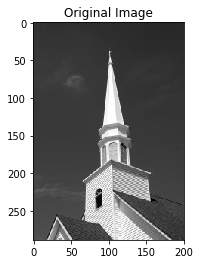

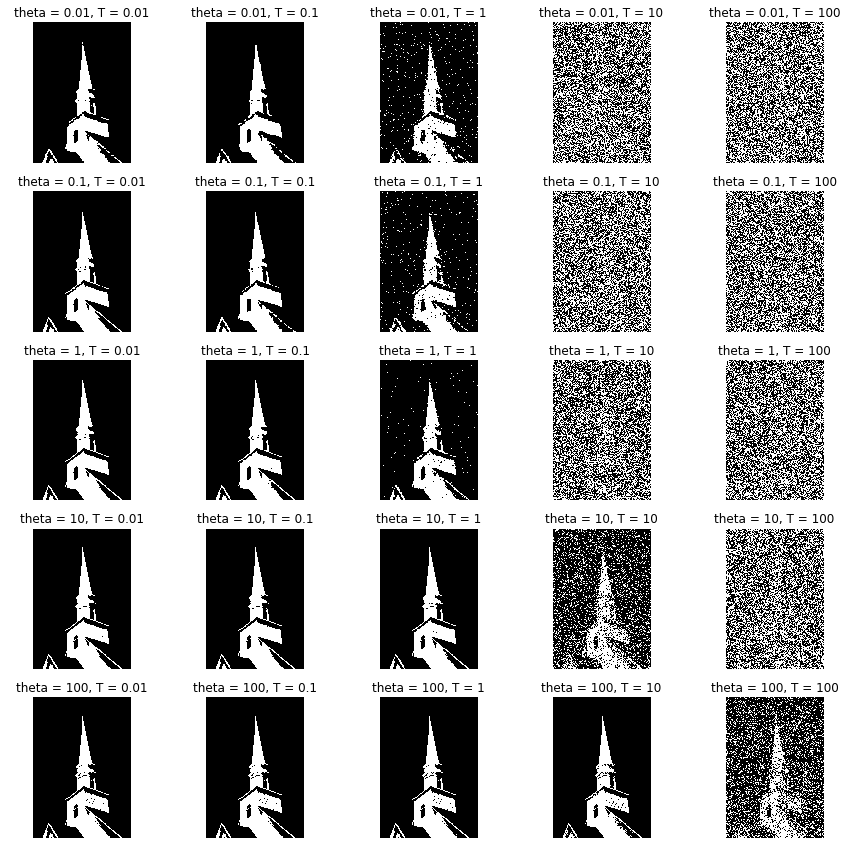

In [4]:
# Plot original image and segmented images for a variety of temperatures and interaction strengths

target = "church-scaled.jpeg" # Note: Image taken from the public domain

# Original Image
originalImage = plt.imread(target)
normOriginal = intensities_to_normalized(originalImage)
grayscaleOriginal = normalized_to_grayscale(normOriginal)
plt.figure(1)
plt.imshow(grayscaleOriginal)
plt.title("Original Image")

# Temperature and couplings to examine
T_range = [.01, .1, 1, 10, 100]
theta_range = [.01, .1, 1, 10, 100]

t1 =time.time()

# Loop over all configurations to test
f, axarr = plt.subplots(len(theta_range), len(T_range))
f.set_figheight(15)
f.set_figwidth(15)
for i in range(len(theta_range)):
    for j in range(len(T_range)):
        segmentedImage = run_metropolis(target, theta_range[i], T_range[j], 200000)
        axarr[i, j].imshow(segmentedImage)
        axarr[i, j].set_title('theta = %s, T = %s' % (theta_range[i],T_range[j]))
        axarr[i, j].axis('off')

t2 = time.time()

print("elapsed time: %s" % (t2-t1))
